In [2]:
!pip install plotly -q

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, r2_score


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [4]:
df = pd.read_csv("conversion_data_train.csv")
df.head(50)

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
5,US,29,0,Seo,7,0
6,US,30,1,Direct,4,0
7,UK,38,1,Ads,2,0
8,UK,26,1,Seo,4,0
9,UK,31,0,Seo,5,0


In [5]:
df.shape

(284580, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [7]:
print(df["converted"].unique())
print(df["new_user"].unique())

[0 1]
[1 0]


In [8]:
print("Converted user :")
print(df["converted"].value_counts())
print("")
print("New user :")
print(df["new_user"].value_counts())
print("")
print("!!! Attention on remarque ici que notre dataset est très désiquilibré, ce qui joue beaucoup sur notre accuracy !!!")

Converted user :
0    275400
1      9180
Name: converted, dtype: int64

New user :
1    195066
0     89514
Name: new_user, dtype: int64

!!! Attention on remarque ici que notre dataset est très désiquilibré, ce qui joue beaucoup sur notre accuracy !!!


In [9]:
df.describe()

,age,new_user,total_pages_visited,converted
count,284580.000000,284580.000000,284580.000000,284580.000000
mean,30.564203,0.685452,4.873252,0.032258
std,8.266789,0.464336,3.341995,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [10]:
df.value_counts()

country  age  new_user  source  total_pages_visited  converted
US       31   1         Seo     3                    0            371
         32   1         Seo     3                    0            360
         30   1         Seo     2                    0            359
         26   1         Seo     3                    0            351
                                2                    0            345
                                                                 ... 
Germany  19   0         Ads     11                   1              1
                                12                   1              1
US       34   0         Direct  25                   1              1
Germany  19   0         Ads     13                   1              1
US       79   1         Direct  1                    0              1
Length: 15811, dtype: int64

In [11]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

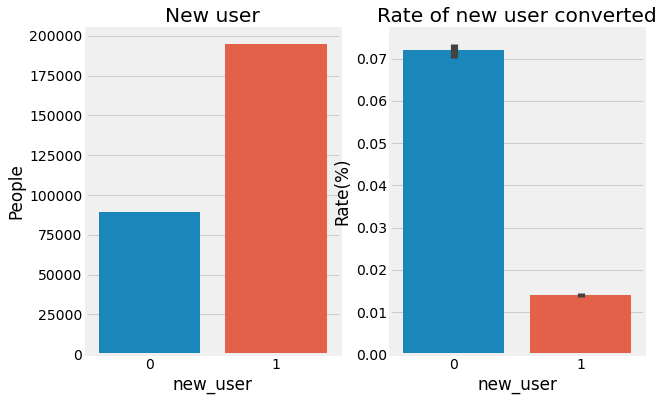

In [13]:
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")

plt.subplot(121) 
ax1 = sns.countplot(x = df["new_user"])
ax1.set_ylabel("People")
ax1.set_title("New user")

plt.subplot(122)
ax2 = sns.barplot(x="new_user",
                  y="converted",
                  data=df)
ax2.set_ylabel("Rate(%)")
ax2.set_title("Rate of new user converted")

plt.show()

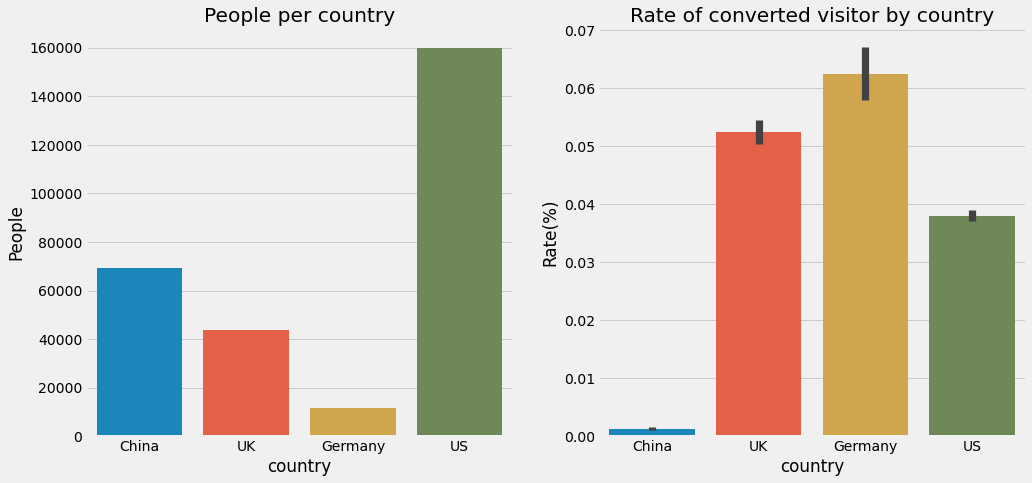

In [14]:
plt.figure(figsize=(15,7))

plt.subplot(121) 
ax1 = sns.countplot(x = df["country"])
ax1.set_ylabel("People")
ax1.set_title("People per country")

plt.subplot(122)
ax2 = sns.barplot(x="country",
            y="converted",
            data=df,
           )
ax2.set_ylabel("Rate(%)")
ax2.set_title("Rate of converted visitor by country")

plt.show()

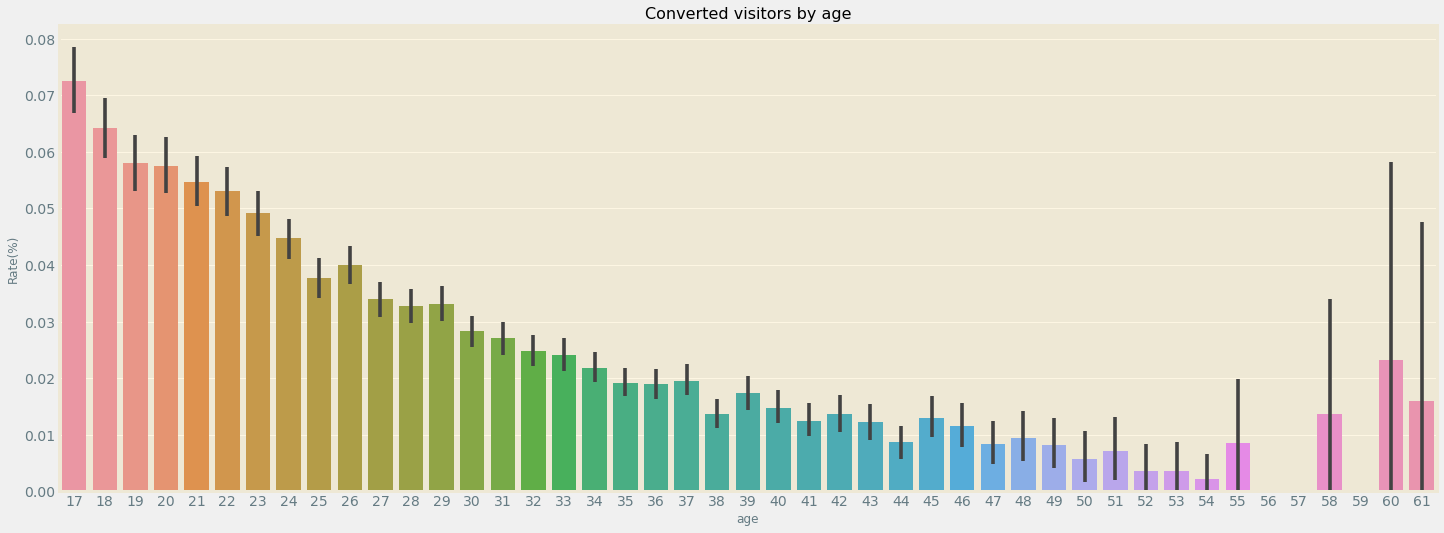

In [15]:
mask = df["age"]<62
df_62 = df.loc[mask]
plt.figure(figsize=(22,8))
plt.style.use("Solarize_Light2")
sns.barplot(x=df_62["age"] ,
            y="converted",
            data=df_62)
plt.ylabel("Rate(%)")
plt.title("Converted visitors by age")
plt.show()

In [16]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["country", "age", "new_user","source", "total_pages_visited"
                    ]
numeric_indices = [1,2,4]
categorical_indices = [0,3]
target_variable = "converted"

X = df.loc[:,features_list]
Y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [16]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [17]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 19 1 'Seo' 1]
 ['US' 33 1 'Direct' 5]
 ['US' 51 1 'Ads' 2]
 ['China' 17 0 'Seo' 1]
 ['China' 28 1 'Seo' 5]]
[['UK' 34 1 'Ads' 1]
 ['UK' 32 0 'Ads' 5]]

[0, 0, 0, 0, 0]
[0, 0]


In [18]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

# Label encoding
print("Encoding labels...")
print(Y_train[0:5])
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

Encoding categorical features and standardizing numerical features...

[['China' 19 1 'Seo' 1]
 ['US' 33 1 'Direct' 5]
 ['US' 51 1 'Ads' 2]
 ['China' 17 0 'Seo' 1]
 ['China' 28 1 'Seo' 5]]
...Done
[[ 0.          0.          0.          0.          1.         -1.3990984
   0.67651656 -1.15935344]
 [ 0.          0.          1.          1.          0.          0.29299544
   0.67651656  0.03743241]
 [ 0.          0.          1.          0.          0.          2.46854467
   0.67651656 -0.86015697]
 [ 0.          0.          0.          0.          1.         -1.64082609
  -1.47816042 -1.15935344]
 [ 0.          0.          0.          0.          1.         -0.31132378
   0.67651656  0.03743241]]
Encoding labels...
[0, 0, 0, 0, 0]
...Done
[0 0 0 0 0]


In [19]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print(X_test[0:5,:])
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
print(type(Y_test))
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])
print(type(Y_test))

Encoding categorical features and standardizing numerical features...
[['UK' 34 1 'Ads' 1]
 ['UK' 32 0 'Ads' 5]
 ['US' 44 1 'Ads' 1]
 ['US' 35 1 'Direct' 1]
 ['US' 29 1 'Direct' 3]]
...Done
[[ 0.          1.          0.          0.          0.          0.41385929
   0.67651656 -1.15935344]
 [ 0.          1.          0.          0.          0.          0.1721316
  -1.47816042  0.03743241]
 [ 0.          0.          1.          0.          0.          1.62249775
   0.67651656 -1.15935344]
 [ 0.          0.          1.          1.          0.          0.53472314
   0.67651656 -1.15935344]
 [ 0.          0.          1.          1.          0.         -0.19045994
   0.67651656 -0.56096051]]
Encoding labels...
[0, 0, 0, 0, 0]
<class 'list'>
...Done
[0 0 0 0 0]
<class 'numpy.ndarray'>


In [20]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...


KeyboardInterrupt: 

In [ ]:
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

In [ ]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

In [ ]:
import seaborn as sns
cm_train = confusion_matrix(Y_train, Y_train_pred, normalize="true")


sns.heatmap(cm_train, annot=True, fmt=".2f")


In [ ]:
cm_test = confusion_matrix(Y_test, Y_test_pred, normalize="true")
sns.heatmap(cm_test, annot=True, fmt=".2f")